# Algotytm przecinania się odcinków na płaszczyźnie

In [1]:
import numpy as np
import pandas as pd
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer
from enum import Enum
from functools import cmp_to_key

# Przydatne funkcje 

In [5]:
def draw_example_1():
    vis = Visualizer()
    line_segments = [(-0.04271371103102162, 0.007908498446146661), (0.004302418001236444, -0.03691380547542198),
(-0.03384274328908614, 0.02509599844614667), (0.017165321227042896, -0.02848856037738276),
(-0.011000001353602261, -0.017367236847970993), (0.030915321227042908, -0.015345178024441575),
(0.002528224452849351, -0.03185865841659845), (0.02670161154962354, 0.0031903611912447033)]

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


In [6]:
example_line_segments_1 = [((-0.04271371103102162, 0.007908498446146661), (0.004302418001236444, -0.03691380547542198)),
((-0.03384274328908614, 0.02509599844614667), (0.017165321227042896, -0.02848856037738276)),
((-0.011000001353602261, -0.017367236847970993), (0.030915321227042908, -0.015345178024441575)),
((0.002528224452849351, -0.03185865841659845), (0.02670161154962354, 0.0031903611912447033))]

example_line_segments_2 = [((-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825)),
((-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.028735700214610402)),
((0.01117741800123645, 0.031431778645982955), (0.012064514775429996, -0.032937093903036674)),
((0.02226612767865581, 0.028061680606767267), (0.022709676065752582, -0.03394812331480138)),
((-0.024306452966505486, -0.015412584099115098), (-0.017431452966505487, -0.007661358608919019))]

example_line_segments_3 = [((0.017165321227042896, 0.04471558346467863), (0.03468548251736549, -0.0014547596725763001)),
((-0.0019072594181183955, 0.030224161896051163), (0.02781048251736548, -0.0065099067313998255)),
((-0.0065645174826345215, 0.002589357974482537), (0.027588708323817088, -0.011228043986301783)),
((-0.003903227160053882, -0.0294265733980665), (0.028697579291559028, -0.020664318496105713)),
((-0.024306452966505486, -0.0122390733980665), (0.002971772839946124, -0.017631230260811592)),
((-0.020536291676182906, 0.0234839658176198), (0.002528224452849351, 0.010340583464678615)),
((-0.0327338723213442, -0.02875255379022336), (0.0009758050980106375, -0.03818882830002729)),
((-0.04271371103102162, -0.003813828300027272), (-0.018096775547150654, -0.00010672045689001652)),
((-0.04559677554715065, 0.036290338366639405), (-0.024306452966505486, 0.011688622680364885)),
((0.02226612767865581, -0.03919985771179199), (0.044665321227042906, -0.01965328908434101))]

### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

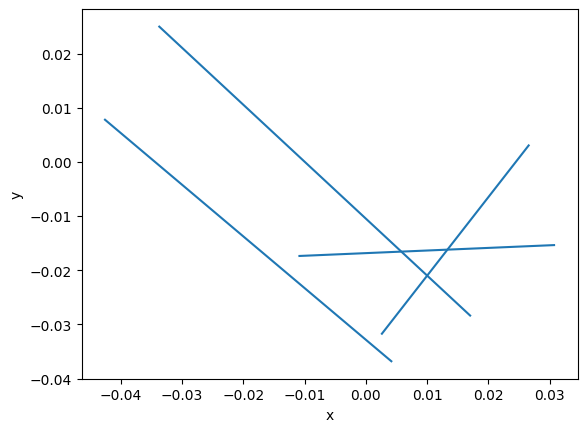

In [7]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

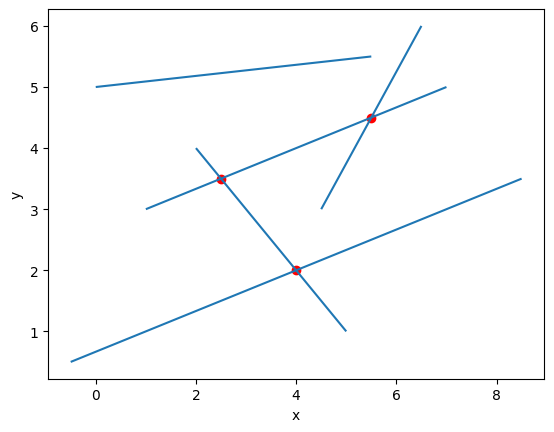

In [8]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [9]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """

    def generate_different(max_val, diff_set, n):
        tab = []

        while len(tab) < n:
            val = np.random.rand(1)[0] * max_val
            if val not in diff_set:
                tab.append(val)

        return tab

    def generate_without_rep(max_val, n):
        s = set()
        tab = []

        while len(s) < n:
            val = np.random.rand(1)[0] * max_val
            if val not in s:
                s.add(val)
                tab.append(val)

        return tab

    x1 = list(np.random.rand(n) * max_x)
    x2 = generate_without_rep(max_x, n)
    y1 = list(np.random.rand(n) * max_y)
    y2 = generate_different(max_y, y1, n)

    return [((x1[i], y1[i]), (x2[i], y2[i])) for i in range(n)]    

In [10]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: WRONG ANSWER
		Output:   punkt początkowy ma współrzędną 0.34942796092948714
		Expected: a końcowy 0.35516869621519853  || linia numer 81 zaczyna i kończy się w tej samej współrzędnej x 
	Test 3: WRONG ANSWER
		Output:   punkt początkowy ma współrzędną 0.07922803801910179
		Expected: a końcowy 0.07777811257621585  || linia numer 8 zaczyna i kończy się w tej samej współrzędnej x 
Result: 1/3
Time: 1.710s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [11]:
section = generate_uniform_sections(200, 200, 10)#generate_uniform_sections(1000, 1000, 20)

Zwizualizuj otrzymane odcinki

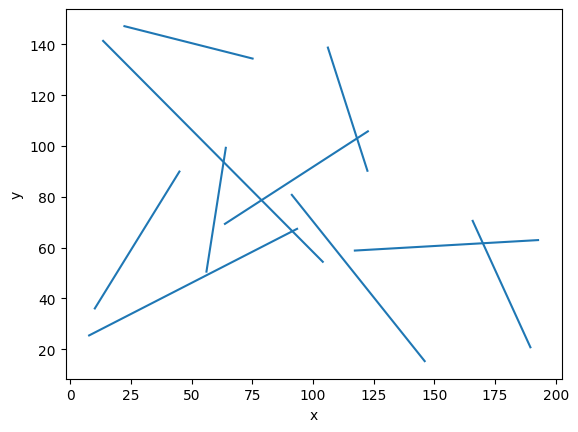

In [12]:
def draw_sections(sections):
    vis = Visualizer()

    vis.add_line_segment(sections)
    vis.show()


draw_sections(section)

Uzupełnij funkcję ```add_sections``` 

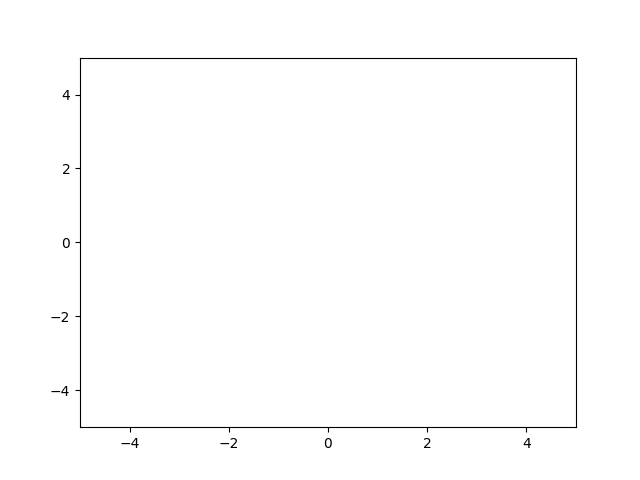

[(-3.8064516744306016, -2.023814808238636)]
[((-3.8064516744306016, -2.023814808238636), (-3.709202976163295, -2.0532084266667234))]
[((-3.8064516744306016, -2.023814808238636), (-3.709202976163295, -2.0532084266667234)), (0.7544354777182303, 0.7629864845441018)]
[((-3.8064516744306016, -2.023814808238636), (-3.709202976163295, -2.0532084266667234)), ((0.7544354777182303, 0.7629864845441018), (-2.5557019665179226, 0.11090162106115331))]
[((-3.8064516744306016, -2.023814808238636), (-3.709202976163295, -2.0532084266667234)), ((0.7544354777182303, 0.7629864845441018), (-2.5557019665179226, 0.11090162106115331)), (0.3048387035246818, 0.3300860516436689)]
[((-3.8064516744306016, -2.023814808238636), (-3.709202976163295, -2.0532084266667234)), ((0.7544354777182303, 0.7629864845441018), (-2.5557019665179226, 0.11090162106115331)), ((0.3048387035246818, 0.3300860516436689), (-1.331802611777984, -1.5067341463903032))]
[((-3.8064516744306016, -2.023814808238636), (-3.709202976163295, -2.0532084

In [1]:
%matplotlib widget
from segment_builder import SegmentBuilder

segment_builder = SegmentBuilder(load=False)
segment_builder.show()

Uzupełnij funkcję ```is_intersection```

In [14]:
def det(a, b, c, d):
    return a * d - b * c

class EventType(Enum):
    BEGIN = 0
    END = 1
    INTERSECT = 2


class Event:
    def __init__(self, position, type, segment_id=None, end_position=None, intersect_ids=None):
        self.position = position
        self.segment_id = segment_id
        self.end_position = end_position
        self.type = type
        self.intersect_ids = intersect_ids

    @staticmethod
    def cmp_xs(event_1, event_2):
        event_1_x, event_1_y = event_1.position
        event_2_x, event_2_y = event_2.position

        if event_1_x != event_2_x:
            return event_1_x-event_2_x

        return event_2_y-event_1_y

    @staticmethod
    def cmp_ys(event_1, event_2):
        event_1_x, event_1_y = event_1.position
        event_2_x, event_2_y = event_2.position

        if event_1_y != event_2_y:
            return event_2_y-event_1_y
        
        return event_1_x-event_2_x

    @staticmethod
    def get_intersect(event_1, event_2):
        if event_1 is None or event_2 is None:
            return None
        if event_1.type == EventType.INTERSECT or event_2.type == EventType.INTERSECT:
            return None

        Ax, Ay = event_1.position
        Cx, Cy = event_2.position

        ABx, ABy = event_1.end_position[0] - event_1.position[0], event_1.end_position[1] - event_1.position[1]

        CDx, CDy = event_2.end_position[0] - event_2.position[0], event_2.end_position[1] - event_2.position[1]

        W = det(CDx, -ABx, CDy, -ABy)

        if W == 0:
            return None
        
        Wt = det(Ax-Cx, -ABx, Ay-Cy, -ABy)
        t = Wt/W

        Wm = det(CDx, Ax-Cx, CDy, Ay-Cy)
        m = Wm/W

        p = (Cx + t * CDx, Cy + t * CDy)

        if 0 <= t and t <= 1 and 0 <= m and m <= 1:
            return Event(position=p, type=EventType.INTERSECT, intersect_ids=[event_1.segment_id, event_2.segment_id])
        return None


class State:
    def __init__(self, cmp_fun):
        self.state = []
        self.cmp_fun = cmp_fun

    def find(self, e):
        def compare_ids(e1, e2):
            e11, e12 = e1.intersect_ids
            e21, e22 = e2.intersect_ids

            return (e11 == e21 and e12 == e22) or (e11 == e22 and e12 == e21)
        
        return len([x for x in self.state if x.type == EventType.INTERSECT and compare_ids(x, e)]) > 0

    def insert(self, e):
        if e is None:
            return
        if e.type == EventType.INTERSECT and self.find(e):
            return
        
        self.state = sorted(self.state + [e], key=cmp_to_key(self.cmp_fun))

    def remove(self, e):
        if e is None:
            return
        self.state = [x for x in self.state if x.segment_id != e.segment_id]

    def get_neighbours_positions(self, e):
        if e is None:
            return [None, None]

        ix_prev = -1
        for ix, prev in enumerate(self.state):
            if self.cmp_fun(prev, e) < 0:
                ix_prev = ix
                
        ix_next = -1
        for ix, nxt in enumerate(self.state):
            if self.cmp_fun(nxt, e) > 0:
                ix_next = ix
                break
        
        return [self.state[ix_prev] if ix_prev != -1 else None, self.state[ix_next] if ix_next != -1 else None]
    
    def get_neighbours(self, e):
        if e is None:
            return [None, None]
        
        e_ix = -1
        for ix, event in enumerate(self.state):
            if e.segment_id == event.segment_id:
                e_ix = ix
                break

        return [self.state[e_ix - 1] if e_ix - 1 >= 0 else None, self.state[e_ix + 1] if e_ix + 1 < len(self.state) else None]
    
    def swap_events(self, e1, e2, e_intersect):
        if e1 is None or e2 is None:
            return
        
        ix1 = -1
        for ix, el in enumerate(self.state):
            if el.segment_id == e1.segment_id:
                ix1 = ix
                break

        ix2 = -1
        for ix, el in enumerate(self.state):
            if el.segment_id == e2.segment_id:
                ix2 = ix
                break

        self.state[ix1], self.state[ix2] = self.state[ix2], self.state[ix1]

        self.state[ix1].position = e_intersect.position
        self.state[ix2].position = e_intersect.position

class Sweep(State):
    def __init__(self, cmp_fun):
        super().__init__(cmp_fun)


class EventsState(State):
    def __init__(self, cmp_fun):
        super().__init__(cmp_fun)
        self.current_ix = 0
    
    def next(self):
        self.current_ix += 1
        return self.state[self.current_ix-1]
    
    def has_next(self):
        return len(self.state) > self.current_ix
    
    def get_intersects(self):
        return [(e.position, *e.intersect_ids) for e in self.state if e.type == EventType.INTERSECT]
    


In [15]:
def is_intersection(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
    :return: True / False
    """
    def swap(coord):
        beg, end = coord
        if beg[0] < end[0]:
            return (beg, end)
        return (end, beg)
    

    sections = [swap(val) for val in sections]

    sections_end = [Event(position=value[1], segment_id=ix ,type=EventType.END) for ix, value in enumerate(sections)]
    sections_begin = [Event(position=value[0], segment_id=ix, end_position=value[1], type=EventType.BEGIN) for ix, value in enumerate(sections)]

    sweep = Sweep(Event.cmp_ys)
    events = EventsState(Event.cmp_xs)

    for e in sections_end:
        events.insert(e)
    for e in sections_begin:
        events.insert(e)

    while events.has_next():
        e = events.next()

        events_to_check = []

        if e.type == EventType.BEGIN:
            sweep.insert(e)
            prev, nxt = sweep.get_neighbours(e)

            events_to_check = [(e, prev), (e, nxt)]


        if e.type == EventType.END:
            prev, nxt = sweep.get_neighbours(e)
            sweep.remove(e)

            events_to_check = [(prev, nxt)]


        for e1, e2 in events_to_check:
            p = Event.get_intersect(e1, e2)

            if p:
                return True

    return False

In [16]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.002s


### W jaki sposób zaimplementowałeś strukturę stanu (stan miotły) oraz strukturę zdarzeń w Twoim programie?

Odpowiedź here

Uzupełnij funkcję ```is_intersection_with_visualization```

In [17]:
def is_intersection_with_visualization(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    def swap(coord):
        beg, end = coord
        if beg[0] < end[0]:
            return (beg, end)
        return (end, beg)
    
    vis = Visualizer()
    vis.add_line_segment(sections, color="grey")

    sweep_bounds = (min([min(val[0][1], val[1][1]) for val in sections]), max([max(val[0][1], val[1][1]) for val in sections]))
    

    sections = [swap(val) for val in sections]

    sections_end = [Event(position=value[1], segment_id=ix ,type=EventType.END) for ix, value in enumerate(sections)]
    sections_begin = [Event(position=value[0], segment_id=ix, end_position=value[1], type=EventType.BEGIN) for ix, value in enumerate(sections)]

    sweep = Sweep(Event.cmp_ys)
    events = EventsState(Event.cmp_xs)

    for e in sections_end:
        events.insert(e)
    for e in sections_begin:
        events.insert(e)

    
    segment_lines = {}

    while events.has_next():
        e = events.next()

        sweep_line = vis.add_line_segment(((e.position[0], sweep_bounds[0]), (e.position[0], sweep_bounds[1])), color="red")

        events_to_check = []

        if e.type == EventType.BEGIN:
            sweep.insert(e)

            segment_lines[e.segment_id] = vis.add_line_segment((e.position, e.end_position))

            prev, nxt = sweep.get_neighbours(e)

            events_to_check = [(e, prev), (e, nxt)]


        if e.type == EventType.END:
            prev, nxt = sweep.get_neighbours(e)
            sweep.remove(e)

            vis.remove_figure(segment_lines[e.segment_id])

            events_to_check = [(prev, nxt)]


        for e1, e2 in events_to_check:
            p = Event.get_intersect(e1, e2)

            if p:
                vis.add_line_segment(((e1.position, e1.end_position), (e2.position, e2.end_position)), color="green")
                vis.add_point(p.position, color="green")
                return True, vis
            
        vis.remove_figure(sweep_line)

    return False, vis

In [18]:
_, vis = is_intersection_with_visualization(example_line_segments_1)
vis.save_gif("is_int_1", interval=500)

Uzupełnij funkcję ```find_intersections```

In [19]:
def find_intersections(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    
    def swap(coord):
        beg, end = coord
        if beg[0] < end[0]:
            return (beg, end)
        return (end, beg)
    

    sections = [swap(val) for val in sections]

    sections_end = [Event(position=value[1], segment_id=ix ,type=EventType.END) for ix, value in enumerate(sections)]
    sections_begin = [Event(position=value[0], segment_id=ix, end_position=value[1], type=EventType.BEGIN) for ix, value in enumerate(sections)]

    sweep = Sweep(Event.cmp_ys)
    events = EventsState(Event.cmp_xs)

    for e in sections_end:
        events.insert(e)
    for e in sections_begin:
        events.insert(e)

    while events.has_next():
        e = events.next()

        events_to_check = []

        if e.type == EventType.BEGIN:
            sweep.insert(e)
            prev, nxt = sweep.get_neighbours(e)

            events_to_check = [(e, prev), (e, nxt)]

        if e.type == EventType.END:
            prev, nxt = sweep.get_neighbours(e)
            sweep.remove(e)

            events_to_check = [(prev, nxt)]

        if e.type == EventType.INTERSECT:
            prev, nxt = sweep.get_neighbours_positions(e)

            sweep.swap_events(prev, nxt, e)

            prev_neigh_1, prev_neigh_2 = sweep.get_neighbours(prev)
            nxt_neigh_1, nxt_neigh_2 = sweep.get_neighbours(nxt)

            events_to_check = [(prev, prev_neigh_1), (prev, prev_neigh_2), (nxt, nxt_neigh_1), (nxt, nxt_neigh_2)]


        for e1, e2 in events_to_check:
            p = Event.get_intersect(e1, e2)

            events.insert(p)

    return [(a, b+1, c+1) for a, b, c in events.get_intersects()]

In [20]:
Test().runtest(3, find_intersections)

Lab 4, task 3:
	Test 1: WRONG ANSWER
		Output:   [((-0.0016743790516658141, -0.007263586832941069), 2, 1), ((0.011526074740254206, 0.006132801296422437), 3, 2), ((0.011860591253227503, -0.018140143229495424), 3, 1), ((0.022344451130778695, 0.01711175484919488), 4, 2), ((0.022658670631229855, -0.026817363547212168), 4, 1)]
		Expected: ['-0.0016743790516658117 -0.007263586832941072 1 2', '0.011526074740254208 0.006132801296422439 2 3', '0.011860591253227505 -0.018140143229495424 1 3', '0.022344451130778698 0.01711175484919488 2 4', '0.022658670631229855 -0.026817363547212168 1 4']
	Test 2: WRONG ANSWER
		Output:   [((0.0058069348076357115, -0.016556444720678153), 2, 3), ((0.010025601838031016, -0.020988202988542277), 2, 4), ((0.013332591183346308, -0.01619339562692305), 4, 3)]
		Expected: ['0.005806934807635715 -0.016556444720678153 2 3', '0.010025601838031018 -0.020988202988542273 2 4', '0.013332591183346312 -0.01619339562692305 3 4']
	Test 3: Passed
Result: 1/3
Time: 0.002s


Uzupełnij funkcję ```find_intersections_with_visualization```

In [21]:
def find_intersections_with_visualization(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    def swap(coord):
        beg, end = coord
        if beg[0] < end[0]:
            return (beg, end)
        return (end, beg)
    
    vis = Visualizer()
    vis.add_line_segment(sections, color="grey")

    sweep_bounds = (min([min(val[0][1], val[1][1]) for val in sections]), max([max(val[0][1], val[1][1]) for val in sections]))
    
    segment_lines = {}

    sections = [swap(val) for val in sections]

    sections_end = [Event(position=value[1], segment_id=ix ,type=EventType.END) for ix, value in enumerate(sections)]
    sections_begin = [Event(position=value[0], segment_id=ix, end_position=value[1], type=EventType.BEGIN) for ix, value in enumerate(sections)]

    sweep = Sweep(Event.cmp_ys)
    events = EventsState(Event.cmp_xs)

    for e in sections_end:
        events.insert(e)
    for e in sections_begin:
        events.insert(e)

    while events.has_next():
        e = events.next()

        sweep_line = vis.add_line_segment(((e.position[0], sweep_bounds[0]), (e.position[0], sweep_bounds[1])), color="red")

        events_to_check = []

        if e.type == EventType.BEGIN:
            sweep.insert(e)
            prev, nxt = sweep.get_neighbours(e)

            segment_lines[e.segment_id] = vis.add_line_segment((e.position, e.end_position))

            events_to_check = [(e, prev), (e, nxt)]

        if e.type == EventType.END:
            prev, nxt = sweep.get_neighbours(e)
            sweep.remove(e)

            vis.remove_figure(segment_lines[e.segment_id])

            events_to_check = [(prev, nxt)]

        if e.type == EventType.INTERSECT:
            prev, nxt = sweep.get_neighbours_positions(e)

            sweep.swap_events(prev, nxt, e)

            prev_neigh_1, prev_neigh_2 = sweep.get_neighbours(prev)
            nxt_neigh_1, nxt_neigh_2 = sweep.get_neighbours(nxt)

            events_to_check = [(prev, prev_neigh_1), (prev, prev_neigh_2), (nxt, nxt_neigh_1), (nxt, nxt_neigh_2)]


        for e1, e2 in events_to_check:
            p = Event.get_intersect(e1, e2)

            events.insert(p)

            if p:
                l = vis.add_line_segment(((e1.position, e1.end_position), (e2.position, e2.end_position)), color="green")
                vis.add_point(p.position, color="green")
                vis.remove_figure(l)

        vis.remove_figure(sweep_line)

    return [(a, b+1, c+1) for a, b, c in events.get_intersects()], vis

In [22]:
_, vis = find_intersections_with_visualization(section)
vis.show_gif(interval=500)

vis.save_gif("find_int_1", interval=500)

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

Odpowiedź here

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

Odpowiedź here

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

In [18]:
# testing_sections = ???

In [19]:
### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 

Odpowiedź here

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.